<a href="https://colab.research.google.com/github/adalbertii/Modele-klasyfikacyjne/blob/main/keras_classification_iris_case.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




Construction of neural networks - classification IRIS model

Using the Keras library


---




Step 1 - Loading the Required Libraries and Modules

In [195]:
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [196]:
import numpy as np
import pandas as pd

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

In [198]:
from sklearn.preprocessing import LabelBinarizer

Step 2 - Preparing the Data and Performing Basic Data Check

In [199]:
iris = pd.read_csv("/content/drive/MyDrive/dane/IRIS.csv")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [200]:
# analiza statystyczna zbioru danych
iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal_width,150.0,3.054000,0.433594,2.0,2.8,3.00,3.3,4.4
petal_length,150.0,3.758667,1.764420,1.0,1.6,4.35,5.1,6.9
petal_width,150.0,1.198667,0.763161,0.1,0.3,1.30,1.8,2.5


In [201]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [202]:
#sprawdzenie rozkładu unikalnych wartości zmiennej objaśnianej
print(np.unique(iris['species'], return_counts=True))


(array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object), array([50, 50, 50]))


In [203]:
iris_dataset = pd.get_dummies(iris,  columns=['species'], prefix='',prefix_sep='') ###

In [204]:
iris_dataset.head()

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
0,5.1,3.5,1.4,0.2,1,0,0
1,4.9,3.0,1.4,0.2,1,0,0
2,4.7,3.2,1.3,0.2,1,0,0
3,4.6,3.1,1.5,0.2,1,0,0
4,5.0,3.6,1.4,0.2,1,0,0


In [205]:

iris_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   sepal_length     150 non-null    float64
 1   sepal_width      150 non-null    float64
 2   petal_length     150 non-null    float64
 3   petal_width      150 non-null    float64
 4   Iris-setosa      150 non-null    uint8  
 5   Iris-versicolor  150 non-null    uint8  
 6   Iris-virginica   150 non-null    uint8  
dtypes: float64(4), uint8(3)
memory usage: 5.3 KB


                                  Matryca korelacji zmiennych                                   


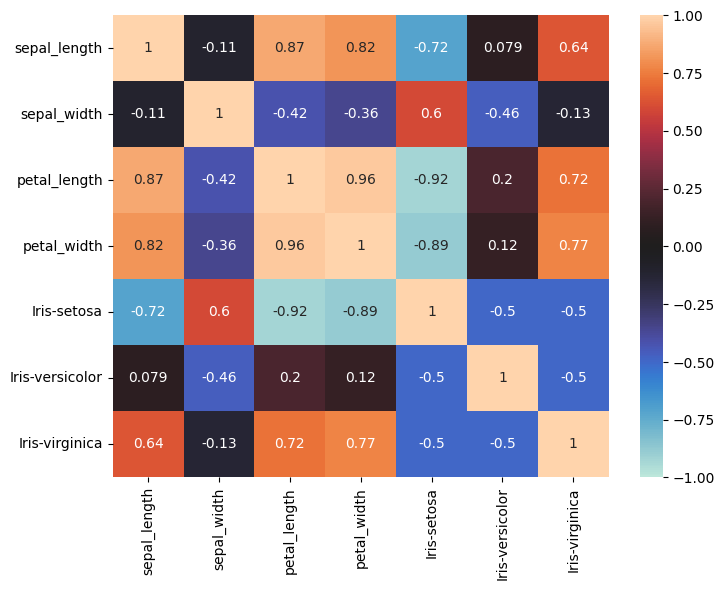

In [206]:
#Sprawdzenie korelacji

print('\033[1mMatryca korelacji zmiennych'.center(100))
plt.figure(figsize=[8,6])
sns.heatmap(iris_dataset.corr(), annot=True, vmin=-1, vmax=1, center=0) #cmap='BuGn'
plt.show()

In [207]:
# sprawdzenie czy występują duplikaty
iris_dataset[iris_dataset.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica
34,4.9,3.1,1.5,0.1,1,0,0
37,4.9,3.1,1.5,0.1,1,0,0
142,5.8,2.7,5.1,1.9,0,0,1


In [208]:
output_data = iris_dataset.drop_duplicates()

In [209]:
output_data[output_data.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,Iris-setosa,Iris-versicolor,Iris-virginica


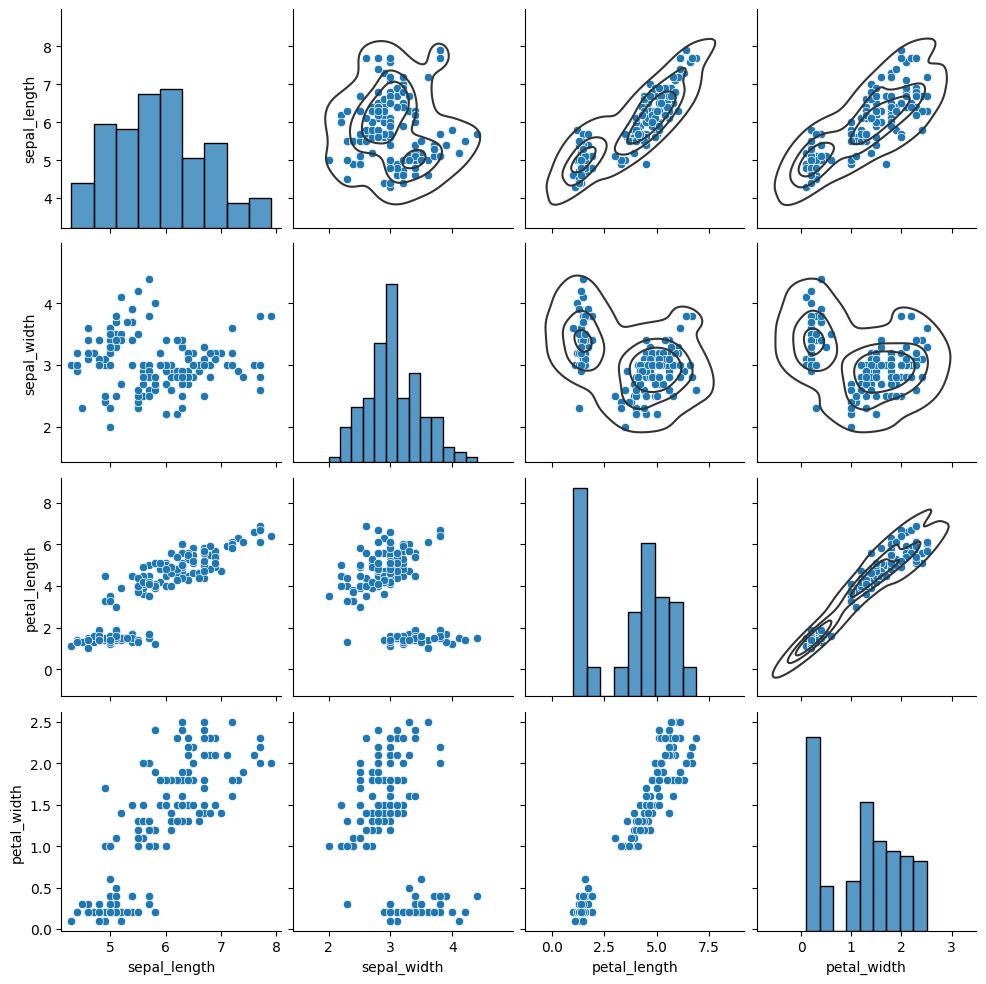

In [210]:
#weryfikacja zależności pomiedzy zmienymi

g = sns.pairplot(output_data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']])
#plt.title('Wykresy par dla wszystkich zmiennych')
g.map_upper(sns.kdeplot, levels=4, color=".2")
plt.show()

**Przygotowanie danych do procesu uczenia**

In [211]:
X=iris.drop('species', axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [212]:
X.shape

(150, 4)

In [213]:
y=iris['species']
y.head

<bound method NDFrame.head of 0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object>

In [214]:
y.unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [215]:
from sklearn.preprocessing import LabelBinarizer

In [216]:
encoder = LabelBinarizer()

y = encoder.fit_transform(y)
y[0:5]


array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0]])

Step 4 - Creating the Training and Test Datasets

In [217]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [218]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.2, random_state=101)

In [219]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120, 3) (30, 3)


In [220]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
104,6.5,3.0,5.8,2.2
89,5.5,2.5,4.0,1.3
116,6.5,3.0,5.5,1.8
82,5.8,2.7,3.9,1.2
112,6.8,3.0,5.5,2.1


In [221]:
scaler = MinMaxScaler()

scaler.fit(X_train)
scaled_X_train = scaler.transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [222]:
scaled_X_train[0:5]

array([[0.61111111, 0.41666667, 0.81355932, 0.875     ],
       [0.33333333, 0.20833333, 0.50847458, 0.5       ],
       [0.61111111, 0.41666667, 0.76271186, 0.70833333],
       [0.41666667, 0.29166667, 0.49152542, 0.45833333],
       [0.69444444, 0.41666667, 0.76271186, 0.83333333]])

Step 5 - building neural network

In [57]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [223]:
model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=[4,]))#
model.add(Dense(units=36, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [224]:
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_35 (Dense)            (None, 4)                 20        
                                                                 
 dense_36 (Dense)            (None, 36)                180       
                                                                 
 dense_37 (Dense)            (None, 48)                1776      
                                                                 
 dense_38 (Dense)            (None, 3)                 147       
                                                                 
Total params: 2123 (8.29 KB)
Trainable params: 2123 (8.29 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


Step 6 - model training

In [225]:
from tensorflow.keras.callbacks import EarlyStopping

#early_stop = EarlyStopping(monitor='val_accuracy', patience=3)
#model.fit(x=scaled_X_train, y=y_train, epochs=300, validation_data=(scaled_X_test, y_test), callbacks=[early_stop])
model.fit(x=scaled_X_train, y=y_train, epochs=200, validation_data=(scaled_X_test, y_test))

Epoch 1/200
4/4 [==============================] - 1s 74ms/step - loss: 1.1121 - accuracy: 0.3083 - val_loss: 1.0957 - val_accuracy: 0.4000
Epoch 2/200
4/4 [==============================] - 0s 12ms/step - loss: 1.0919 - accuracy: 0.3167 - val_loss: 1.0805 - val_accuracy: 0.4333
Epoch 3/200
4/4 [==============================] - 0s 13ms/step - loss: 1.0748 - accuracy: 0.5750 - val_loss: 1.0674 - val_accuracy: 0.6333
Epoch 4/200
4/4 [==============================] - 0s 18ms/step - loss: 1.0609 - accuracy: 0.6417 - val_loss: 1.0551 - val_accuracy: 0.6000
Epoch 5/200
4/4 [==============================] - 0s 14ms/step - loss: 1.0451 - accuracy: 0.6583 - val_loss: 1.0431 - val_accuracy: 0.6000
Epoch 6/200
4/4 [==============================] - 0s 18ms/step - loss: 1.0298 - accuracy: 0.6750 - val_loss: 1.0299 - val_accuracy: 0.6000
Epoch 7/200
4/4 [==============================] - 0s 15ms/step - loss: 1.0140 - accuracy: 0.6833 - val_loss: 1.0160 - val_accuracy: 0.6000
Epoch 8/200
4/4 [===

In [226]:
metrics = pd.DataFrame(model.history.history)

In [227]:
metrics.head()

,loss,accuracy,val_loss,val_accuracy
0,1.112051,0.308333,1.095728,0.400000
1,1.091866,0.316667,1.080494,0.433333
2,1.074763,0.575000,1.067446,0.633333
3,1.060909,0.641667,1.055068,0.600000
4,1.045055,0.658333,1.043060,0.600000


<Axes: >

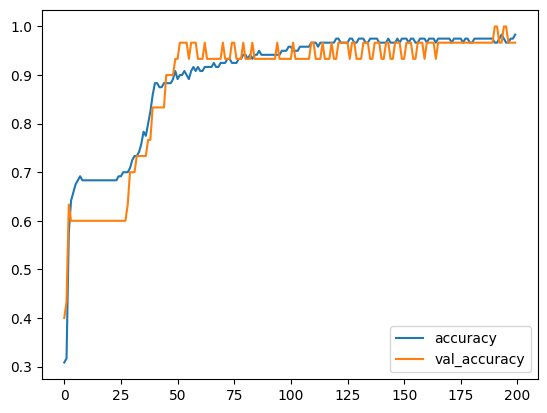

In [228]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

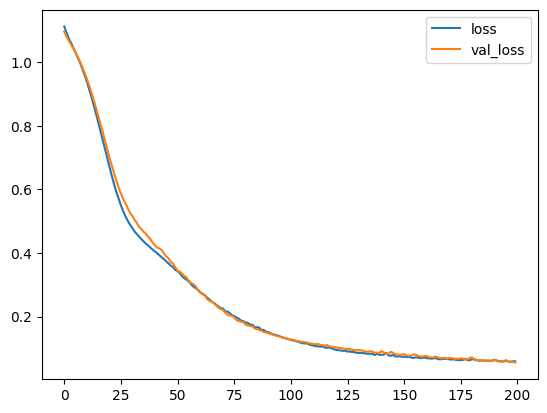

In [229]:
metrics[['loss', 'val_loss']].plot()

Step 6 -  model verification

In [230]:
model.evaluate(scaled_X_test,y_test,verbose=0)

[0.055789001286029816, 0.9666666388511658]

In [231]:
y_pred = model.predict(scaled_X_test)

1/1 [==============================] - 0s 64ms/step


In [232]:
# Macierz konfuzji
from sklearn.metrics import classification_report,confusion_matrix
conf_test=confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))

print(conf_test)

[[10  0  0]
 [ 0 11  1]
 [ 0  0  8]]


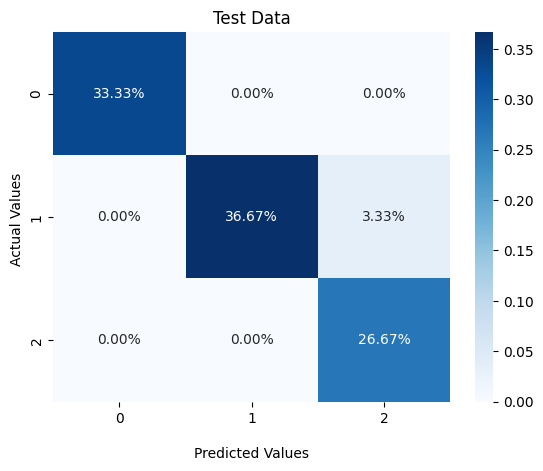

In [233]:
ax = sns.heatmap(conf_test/np.sum(conf_test), annot=True,
            fmt='.2%', cmap='Blues')

ax.set_title('Test Data');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');


plt.show()

In [234]:
print(classification_report(y_test.argmax(axis=1), y_pred.argmax(axis=1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.92      0.96        12
           2       0.89      1.00      0.94         8

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [235]:
epochs = len(metrics)

In [236]:


scaled_X = scaler.fit_transform(X)

model = Sequential()
model.add(Dense(units=4, activation='relu', input_shape=[4,]))
model.add(Dense(units=36, activation='relu'))
model.add(Dense(units=48, activation='relu'))
model.add(Dense(units=3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(scaled_X, y, epochs=epochs)


model.save("final_iris_model.h5")

Epoch 1/200
5/5 [==============================] - 1s 7ms/step - loss: 1.0859 - accuracy: 0.3467
Epoch 2/200
5/5 [==============================] - 0s 6ms/step - loss: 1.0736 - accuracy: 0.7133
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 1.0610 - accuracy: 0.7600
Epoch 4/200
5/5 [==============================] - 0s 8ms/step - loss: 1.0469 - accuracy: 0.7800
Epoch 5/200
5/5 [==============================] - 0s 6ms/step - loss: 1.0302 - accuracy: 0.7733
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 1.0113 - accuracy: 0.7733
Epoch 7/200
5/5 [==============================] - 0s 6ms/step - loss: 0.9884 - accuracy: 0.7733
Epoch 8/200
5/5 [==============================] - 0s 5ms/step - loss: 0.9615 - accuracy: 0.7733
Epoch 9/200
5/5 [==============================] - 0s 6ms/step - loss: 0.9294 - accuracy: 0.7667
Epoch 10/200
5/5 [==============================] - 0s 6ms/step - loss: 0.8940 - accuracy: 0.7800
Epoch 11/200
5/5 [===========

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [237]:
import joblib
joblib.dump(scaler, 'iris_scaler.pkl')

['iris_scaler.pkl']



---


**Testing and preparing deployment package**



---



In [238]:
from tensorflow.keras.models import load_model

flower_model = load_model('final_iris_model.h5')
flower_scaler = joblib.load('iris_scaler.pkl')



In [119]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [127]:
X_test.shape

(30, 4)

In [240]:
X_test[4:5]

,sepal_length,sepal_width,petal_length,petal_width
50,7.0,3.2,4.7,1.4


In [241]:
y_test[4:5]

array([[0, 1, 0]])

In [242]:
# kielich i płatki
# przykład dla 'Iris-versicolor'
flower_example={"sepal_length": 7.0,
                "sepal_width": 3.2,
                "petal_length": 4.7,
                "petal_width": 1.4}

Prediction function definition

In [243]:
def return_prediction(model, scaler, sample_json):
    s_len = sample_json["sepal_length"]
    s_wid = sample_json["sepal_width"]
    p_len = sample_json["petal_length"]
    p_wid = sample_json["petal_width"]

    flower = [[s_len, s_wid, p_len, p_wid ]]

    classes = np.array(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'))


    flower =  scaler.transform(flower)
    predict_x = model.predict(flower)
    classes_ind = np.argmax(predict_x,axis=1)


    return classes[classes_ind][0]



In [245]:

result = return_prediction(flower_model, flower_scaler, flower_example)
result

1/1 [==============================] - 0s 38ms/step


'Iris-versicolor'

In [250]:
encoder.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype='<U15')

In [248]:
X_test[0:1]

,sepal_length,sepal_width,petal_length,petal_width
33,5.5,4.2,1.4,0.2


In [249]:
y_test[0:1]

array([[1, 0, 0]])

In [253]:
# przykład dla 'Iris-setosa'
flower_example={"sepal_length": 5.5,
                "sepal_width": 4.2,
                "petal_length": 1.4,
                "petal_width": 0.2}

result = return_prediction(flower_model, flower_scaler, flower_example)
result

1/1 [==============================] - 0s 36ms/step


'Iris-setosa'